read the data from nist... file   
    problem may come up: can't read the data    
                         can't related the data with colunm      
                         type error     
  
    
mapping wafer    
    pro: how to mapping?    
         how to do sth like circle backgrond     
         
goal 1:
    for each pixel which pad them go

goal 2:
    for neibor pad which pixel they go

    

paper(more like backgroud introduction) or pdf 
    Fig 17
        circle
        cross (focus point)
        dark point

Airy disk

crosstalk

​
Yifu Chen
​
https://arxiv.org/pdf/1403.4302

We talked about Figure 17, and crosstalk.

https://en.wikipedia.org/wiki/Airy_disk

https://webbtelescope.org/contents/media/images/01G529MX46J7AFK61GAMSHKSSN

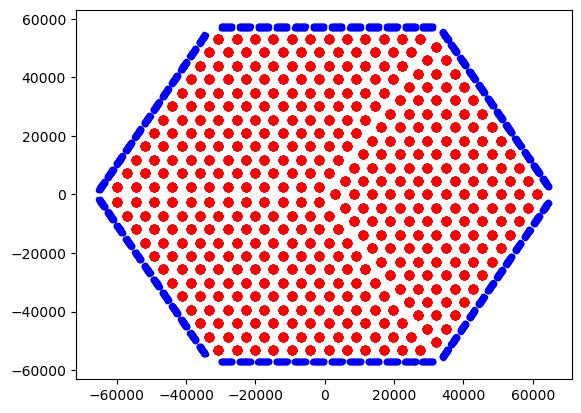

In [17]:
#This will be the program first use histogram  and then mapping the wafer

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd


#Read the data
data = pd.read_csv('nist_so_mf_detector_array_padinfo.csv')

#get columns vaule about pixel positon
pixel_x_center = data['Pixel X center']
pixel_y_center = data['Pixel Y center']



# try use same method above by Pad X center,Pad Y center
pad_x_center = data['Pad X center']
pad_y_center = data['Pad Y center']

# pad_x_center = pad_x_center[1:3000] #The code see how pad positon data goes
# pad_y_center = pad_y_center[1:3000]


#histogram
#plt.hist2d(pixel_x_center, pixel_y_center, bins = (100,100), norm=colors.LogNorm())
plt.scatter(pixel_x_center, pixel_y_center, c='r', marker='o')
plt.scatter(pad_x_center, pad_y_center, c='b', marker='.')
#colors.LogNorm() normalize a given value to the 0-1 range on a log scale to show the log scale
# use norm to emphasize the exist value 

plt.show()

#this plot show the wafer location in the plot

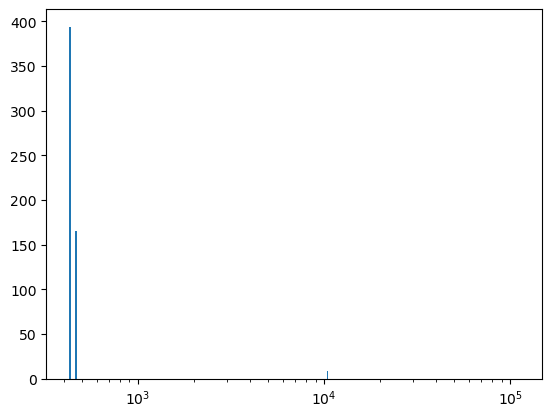

692.0


In [26]:
""" 
this part of code is the goal 1 of the project
    calculate the data for each pixel the distance to the related pad
    histogram of the data
"""
data_goal1 = data[['Pixel X center', 'Pixel Y center', 'Pad X center', 'Pad Y center']]
data_goal1 = np.array(data_goal1).tolist()

#get unique pixel x 
unique_pixel_x = np.unique(pixel_x_center)

distance_goal1 = []
#first group the data by pixel x save to group_data
#and then group the data by pixel y
#and then calculate the distance to the pad

for j in range(len(unique_pixel_x)):
    group_data = []
    
    
    #first group the data by pixel x
    for i in range(len(data)):
        if pixel_x_center[i] == unique_pixel_x[j]:
            group_data.append(data_goal1[i])

    # get pixel y position from group_data
    group_data = np.array(group_data)
    unique_pixel_y = np.unique(group_data[:,1])   
    for k in range(len(unique_pixel_y)):

        group_data_y = []
        for i in range(len(group_data)):
            if pixel_y_center[i] == unique_pixel_y[k]:
                #group the data by same pixel y   
                group_data_y.append(group_data[i])
        
        length_group_y = len(group_data_y)

        #calculate the distance between pad for one group
        for i in range(length_group_y):
            if i+1 < length_group_y: 
                pad_x_distance = group_data_y[i][2] - group_data_y[i+1][2]
                pad_y_distance = group_data_y[i][3] - group_data_y[i+1][3]
            
            elif i == length_group_y:
                pad_x_distance = group_data_y[i][2] - group_data_y[0][2]
                pad_y_distance = group_data_y[i][3] - group_data_y[0][3]
                
            distance = np.sqrt((pad_x_distance)**2 + (pad_y_distance)**2)
            distance_goal1.append(distance)


#save histogram data to a file         

num, bins, patches = plt.hist(distance_goal1, bins=10000)

path_filename = f'.\data\same pixel to pad {len(bins)-1}bins data'
plt.savefig(f'{path_filename}.png') 
#   bins =60000 need run 4min10.3sec

#create an array stored the value number per bin
number_per_bin = []
for i in range(len(patches)):
    if num[i] != 0:
        number_per_bin.append([f"({bins[i]},{bins[i+1]})",num[i]])
        
    
    
# Save data to CSV
number_per_bin = np.array(number_per_bin)
data_NpB = np.column_stack((number_per_bin[:,0],number_per_bin[:,1])) 
# the data for number_per_bin
df = pd.DataFrame(data_NpB,columns=['range of distance','number in the range'])
df.to_csv(f'{path_filename}.csv', index=False)

plt.xscale('log')
plt.show()

print(np.sum(num))          

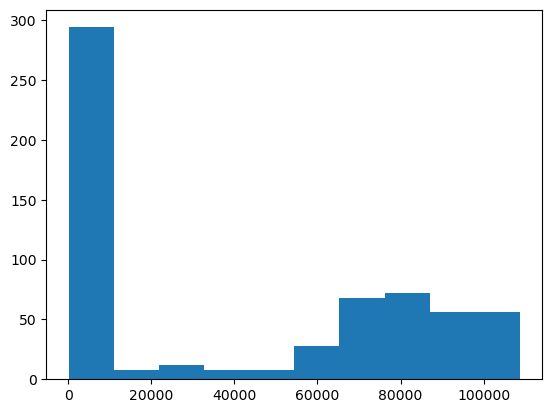

610.0


In [19]:
""" 
this part of code is the goal 1 of the project
    calculate the data for each pixel the distance to the related pad
    histogram of the data
"""

data_goal1 = data[['Pixel X center', 'Pixel Y center', 'Pad X center', 'Pad Y center']]
data_goal1 = np.array(data_goal1)
#print(data_goal1)

distance_goal1 = []

done_pixel_x = []
done_pixel_y = []

for i in range(len(data_goal1)):
    for j in range(len(data_goal1)):
        if i == j:
            continue

        if data_goal1[i][0] in done_pixel_x and data_goal1[i][1] in done_pixel_y:
            continue

        if data_goal1[i][0] == data_goal1[j][0] and data_goal1[i][1] == data_goal1[j][1]:
            distance_goal1.append(np.sqrt((data_goal1[i][2] - data_goal1[j][2])**2 + (data_goal1[i][3] - data_goal1[j][3])**2))
        
    done_pixel_x.append(data_goal1[i][0])
    done_pixel_y.append(data_goal1[i][1])
                
#save histogram data to a file            
num, bins, patches = plt.hist(distance_goal1, bins=10)
plt.savefig(f'.\data\same pixel to pad {len(bins)-1}bins data2.png') 
#   bins =60000 need run 4min10.3sec

#create an array stored the value number per bin
number_per_bin = []
for i in range(len(patches)):
    if num[i] != 0:
        number_per_bin.append([f"({bins[i]},{bins[i+1]})",num[i]])
        
    
    
# Save data to CSV
number_per_bin = np.array(number_per_bin)
data_NpB = np.column_stack((number_per_bin[:,0],number_per_bin[:,1])) 
# the data for number_per_bin
df = pd.DataFrame(data_NpB,columns=['range of distance','number in the range'])
df.to_csv(f'.\data\same pixel to pad {len(bins)-1}bins data2.csv', index=False)


plt.show()
print(np.sum(num))

We have  3528  data 
 max is:  64000.2450081195 
 min is:  3857.941575709121


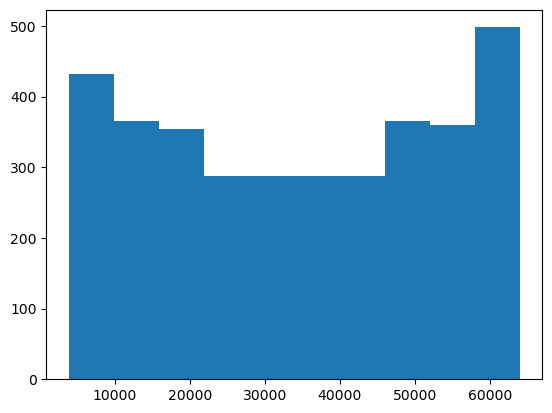

In [20]:
""" 
this part of code is doing sth
    this code calculate the distance between pixel and pad
"""

#use the for loop for all pixel position to calculate the distance to the pad
# this wouldn't grouping the pixel at same positon 

distance = []

#distance = sqrt((x1-x2)^2 + (y1-y2)^2)
for i in range(len(data)):
    x_distance = pixel_x_center[i]-pad_x_center[i]
    y_distance = pixel_y_center[i]-pad_y_center[i]
    distance.append(np.sqrt(x_distance**2 + y_distance**2))


#show how many pixel we calculted the distance
print("We have ",len(distance),
      " data \n max is: ",np.max(distance),
      "\n min is: ",np.min(distance)) 

num, bins, patches = plt.hist(distance, bins=10)
plt.savefig(f'.\data\pixel to pad {len(bins)-1}bins data.png') 
#   bins =60000 need run 1min22sec

#create an array stored the value number per bin
number_per_bin = []
for i in range(len(patches)):
    if num[i] != 0:
        number_per_bin.append([f"({bins[i]},{bins[i+1]})",num[i]])
        
    
    
# Save data to CSV
number_per_bin = np.array(number_per_bin)
data_NpB = np.column_stack((number_per_bin[:,0],number_per_bin[:,1])) 
# the data for number_per_bin
df = pd.DataFrame(data_NpB,columns=['range of distance','number in the range'])
df.to_csv(f'.\data\pixel to pad {len(bins)-1}bins data.csv', index=False)


plt.show()

In [21]:
"""
This part of code is the goal 2 of the project
    grouping the pad which are neighbor to each other
    get the distance between their related pixel position
    plot the histogram of the distance
"""

#how decide the pad is neighbor to each other
# if the pad_x_center and pad_y_center are close to each other?








'\nThis part of code is the goal 2 of the project\n    grouping the pad which are neighbor to each other\n    get the distance between their related pixel position\n    plot the histogram of the distance\n'

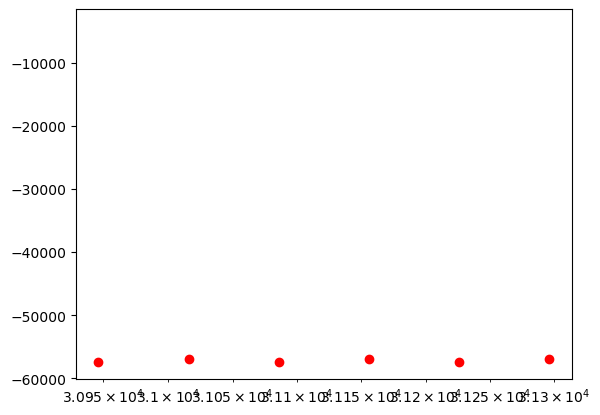

In [27]:
""" 
test the goal1 by using the Pixel X center,Pixel Y center = (-1529.978,2650.000) point
    one point show x,y position of the wafer
    plot four wires(?) show the wafer to pad edge
    
May need use animation to show each wafer to pad edge
problem is the plot about pad position is not clear
"""
#pick out the test point (-1529.978,2650.000)
testPoint = [[],[]]



for i in range(len(data)):
    if (data['Pixel X center'][i] == pixel_x_center[100]) and (data['Pixel Y center'][i] == pixel_y_center[100]):
        testPoint[0].append([data['Pad X center'][i]])
        testPoint[1].append([data['Pad Y center'][i]])
        

#print(testPoint)

plt.plot(testPoint[0],testPoint[1], 'ro')
plt.xscale('log') #???
plt.show()
